In [126]:
import pandas as pd
import numpy as np
import scipy
import matplotlib

### DISTRIBUIÇÕES DE PROBABILIDADE

### Distribuição Binomial
***

Um evento **binomial** é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Estas categorias somadas representam todo o espaço amostral, sendo também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra.

Em análises estatísticas o uso mais comum da distribuição binomial é na solução de problemas que envolvem situações de **sucesso** e **fracasso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Onde:

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$n$ = número de eventos estudados

$k$ = número de eventos desejados que tenham sucesso

### Experimento Binomial
1. Realização de $n$ ensaios idênticos.

2. Os ensaios são independentes.

3. Somente dois resultados são possíveis, exemplo: Verdadeiro ou falso; Cara ou coroa; Sucesso ou fracasso.

4. A probabilidade de sucesso é representada por $p$ e a de fracasso por $1-p=q$. Estas probabilidades não se modificam de ensaio para ensaio.

### Média da distribuição binomial
O valor esperado ou a média da distribuição binomial é igual ao número de experimentos realizados multiplicado pela chance de ocorrência do evento.

# $$\mu = n \times p$$

### Desvio padrão da distribuição binomial
O desvio padrão é o produto entre o número de experimentos, a probabilidade de sucesso e a probabilidade de fracasso.

# $$\sigma = \sqrt{n \times p \times q}$$

In [68]:
from scipy.special import comb

### Combinações

Número de combinações de $n$ objetos, tomados $k$ a cada vez, é:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Onde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definição

## $$0! = 1$$

## Mega sena
Em um volante de loteria da Mega Sena temos um total de **60 números** para escolher onde a aposta mínima é de **seis números**. Você que é curiosa(o) resolve calcular a probabilidade de se acertar na Mega Sena com apenas **um jogo**. Para isso precisamos saber quantas **combinações de seis números podem ser formadas com os 60 números disponíveis**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [71]:
combinacoes = comb(60,6)
combinacoes

50063860.0

In [74]:
prob = 1/combinacoes
print('%0.15f'%prob)

0.000000019974489


In [75]:
#Exemplo show de premios 
comb_show = comb(25,20)
comb_show

53130.0

In [76]:
prob_show = 1/comb_show
print('%0.15f'%prob_show)

0.000018821757952


Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo**.

In [77]:
n = 10

#Probabilidade de acerto 
p = 1/3
q= 1- p

In [78]:
#Problema 1: número de eventos que desejamos obter sucesso
k = 5

In [80]:
#Método manual importando apena comb
probabilidade  = (comb(n,k) * (p**k) *(q** (n-k)))
print('%0.15f'%probabilidade)

0.136564548087182


In [82]:
from scipy.stats import binom 

In [83]:
probabilidade = binom.pmf(k,n,p)
print('%0.15f'%probabilidade)

0.136564548087181


In [ ]:
#Problema 2: número de eventos que desejamos obter sucesso (Qual a probabilidade da pessoa passar?)
#Probabilidade de k >= 5

In [84]:
probabilidade = binom.pmf(5,n,p) + binom.pmf(6,n,p) + binom.pmf(7,n,p) + binom.pmf(8,n,p) + binom.pmf(9,n,p) + binom.pmf(10,n,p)
print('%0.15f'%probabilidade)

0.213128080069095


In [86]:
probabilidade = binom.pmf([5,6,7,8,9,10],n,p).sum()
print('%0.15f'%probabilidade)

0.213128080069095


O método cdf traz a probabilidade acumulada, como mostrada abaixo:

In [87]:
binom.cdf(4,n,p)

0.7868719199309048

**Queremos o complementar disso**

In [88]:
1 - binom.cdf(4,n,p)

0.21312808006909523

In [91]:
binom.sf(4,n,p)

0.21312808006909525

Ex1: Uma moeda, perfeitamente equilibrada, é lançada para o alto quatro vezes. Utilizando a distribuição binomial, obtenha a probabilidade de a moeda cair com a face coroa voltada para cima duas vezes.

In [99]:
n = 4
p = 1/2
q = 1-p
k = 2
probabilidade = binom.pmf(k,n,p)
print('%0.15f'%probabilidade)

0.375000000000000


Ex2: Um dado, perfeitamente equilibrado, é lançado para o alto dez vezes. Utilizando a distribuição binomial, obtenha a probabilidade de o dado cair com o número cinco voltado para cima pelo menos três vezes.

In [101]:
n = 10
p = 1/6
k = 3
probabilidade =binom.sf(2,n,p)
print('%0.15f'%probabilidade)

0.224773202128741


Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última gincana se sabe que a proporção de participantes do sexo feminino foi de 60%. O total de equipes, com 12 integrantes, inscritas na gincana deste ano é de 30. Com as informações acima responda: Quantas equipes deverão ser formadas por 8 mulheres?

In [111]:
n = 12
p = 0.6
k = 8

In [112]:
prob = binom.pmf(k,n,p)
print('%0.8f'%prob)

0.21284094


In [114]:
equipes = 30*prob
print('%0.0f'%equipes)

6


Suponha que a probabilidade de um casal ter filhos com olhos azuis seja de 22%. Em 50 famílias, com 3 crianças cada uma, quantas podemos esperar que tenham dois filhos com olhos azuis?

In [123]:
p = 0.22
n = 3
k = 2
prob = binom.pmf(k,n,p)
familia = prob * 50
print(familia)

5.662799999999996


***

## Distribuição Poisson

É empregada para descrever o número de ocorrências em um intervalo de tempo ou espaço específico. Os eventos são caracterizados pela possibilidade de contagem dos sucessos, mas a não possibilidade de contagem dos fracassos.

Como exemplos de processos onde podemos aplicar a distribuição de Poisson temos a determinação do número de clientes que entram em uma loja em determinada hora, o número de carros que chegam em um drive-thru de uma lanchonete na hora do almoço, a determinação do número de acidentes registrados em um trecho de estrada etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Onde:

$e$ = constante cujo valor aproximado é 2,718281828459045

$\mu$ = representa o número médio de ocorrências em um determinado intervalo de tempo ou espaço

$k$ = número de sucessos no intervalo desejado

### Experimento Poisson

1. A probabilidade de uma ocorrência é a mesma em todo o intervalo observado.

2. O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos.

3. A probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento.

### Média da distribuição Poisson

# $$\mu$$

### Desvio padrão da distribuição Poisson
# $$\sigma = \sqrt{\mu}$$

Ex:Um restaurante recebe em média 20 pedidos por hora. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba 15 pedidos?

In [124]:
u = 20
k = 15

In [131]:
import numpy as np
import math
prob = ((np.e ** (-u)) * (u**k)) / (math.factorial(k))
prob

0.0516488535317584

In [133]:
from scipy.stats import poisson

prob = poisson.pmf(k,u)
prob

0.05164885353175814

Ex2: O número médio de clientes que entram em uma padaria por hora é igual a 20. Obtenha a probabilidade de, na próxima hora, entrarem exatamente 25 clientes.

In [135]:
u = 20
k = 25

prob = poisson.pmf(k,u)
prob

0.04458764910826764

***

### Distribuição Normal

A distribuição normal é uma das mais utilizadas em estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável quantitativa apresenta a forma de sino e é simétrica em relação a sua média.

![Normal](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img001.png)

### Características importantes
1. É simétrica em torno da média;

2. A área sob a curva corresponde à proporção 1 ou 100%;

3. As medidas de tendência central (média, mediana e moda) apresentam o mesmo valor;

4. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$;

5. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;

6. A distribuição é definida por sua média e desvio padrão;

7. A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

A probabilidade é obtida a partir da área sob a curva, delimitada pelos limites inferior e superior especificados. Um exemplo pode ser visto na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img002.png)

Para obter a área acima basta calcular a integral da função para os intervalos determinados. Conforme equação abaixo:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

$L_i$ = limite inferior

$L_s$ = limite superior

### Tabelas padronizadas
As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas.

Para consultarmos os valores em uma tabela padronizada basta transformarmos nossa variável em uma variável padronizada $Z$.

Esta variável $Z$ representa o afastamento em desvios padrões de um valor da variável original em relação à média.
# $$Z = \frac{x-\mu}{\sigma}$$

Onde:

$x$ = variável normal com média $\mu$ e desvio padrão $\sigma$

$\sigma$ = desvio padrão

$\mu$ = média

In [136]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<img src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img003.png' width='250px'>

A tabela acima fornece a área sob a curva entre $-\infty$ e $Z$ desvios padrão acima da média. Lembrando que por se tratar de valores padronizados temos $\mu = 0$.

Exemplo: Qual sua altura?
    Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

In [139]:
#Obter variável z
media = 1.7
dp = 0.1
x = 1.8

z = (x - media) / dp
z

1.0000000000000009

prob = 0.8413

In [140]:
#Utilizando scipy 
from scipy.stats import norm
norm.cdf(z)


0.8413447460685431

*probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.*
<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img005.png' width='350px'>

In [143]:
media = 1.7
dp = 0.1
x2 = 1.8
z2 = (x2 - media) / dp
z2

1.0000000000000009

In [144]:
media = 1.7
dp = 0.1
x = 1.6
z = (x - media) / dp
z

-0.9999999999999987

In [146]:
norm.cdf(z2) - norm.cdf(z)

0.6826894921370857

*Probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.*
<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img006.png' width='350px'>

In [151]:
media = 1.7
dp = 0.1
x3 = 1.9
z3 = (x3 - media) / dp
z3

1.9999999999999996

In [152]:
1 - norm.cdf(z3)

0.02275013194817921

Ex.normal - A aplicação de uma prova de estatística em um concurso apresentou um conjunto de notas normalmente distribuídas. Verificou-se que o conjunto de notas tinha média 70 e desvio padrão de 5 pontos.

Qual a probabilidade de um aluno, selecionado ao acaso, ter nota menor que 85?

In [153]:
media = 70
dp = 5
x = 85

z = (x-media)/dp
norm.cdf(z)

0.9986501019683699

O faturamento diário de um motorista de aplicativo segue uma distribuição aproximadamente normal, com média 300.00 e desvio padrão igual a 50.00. Obtenha as probabilidades de que, em um dia aleatório, o motorista ganhe:

1) Entre 250.00 e 350.00

2) Entre 400.00 e 500.00

In [154]:
media = 300
dp = 50
x1_final = 350
x1_inicial = 250

z1_inicial = (x1_inicial-media)/dp
z1_final = (x1_final-media)/dp
norm.cdf(z1_final) - norm.cdf(z1_inicial)

0.6826894921370859

In [155]:
media = 300
dp = 50
x2_final = 500
x2_inicial = 400

z2_inicial = (x2_inicial-media)/dp
z2_final = (x2_final-media)/dp
norm.cdf(z2_final) - norm.cdf(z2_inicial)

0.02271846070634609

O Inmetro verificou que as lâmpadas incandescentes da fabricante XPTO apresentam uma vida útil normalmente distribuída, com média igual a 720 dias e desvio padrão igual a 30 dias. Calcule a probabilidade de uma lâmpada, escolhida ao acaso, durar:

1) Entre 650 e 750 dias

2) Mais que 800 dias

3) Menos que 700 dias

In [175]:
media = 720
dp = 30
x1_final = 750
x1_inicial = 650
z1_inicial = (x1_inicial-media)/dp
z1_final = (x1_final-media)/dp
norm.cdf(z1_final) - norm.cdf(z1_inicial)

0.8315294174398976

In [176]:
x2 = 800
z2 = (x2-media)/dp
1 - norm.cdf(z2)

0.003830380567589775

In [178]:
x3 = 700
z3 = (x3-media)/dp
norm.cdf(z3)

0.2524925375469229

Utilizando a tabela padronizada, ou o ferramental disponibilizado pelo Python, encontre a área sob a curva normal para os valores de Z abaixo:

1) Z < 1,96

2) Z > 2,15

3) Z < -0,78

4) Z > 0,59

In [180]:
print(norm.cdf(1.96))
print(1 - norm.cdf(2.15))
print(norm.cdf(-0.78))
print(1 - norm.cdf(0.59))

0.9750021048517795
0.015777607391090465
0.21769543758573312
0.27759532475346493


***

## Amostragem

In [181]:
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [182]:
dados.shape[0]

76840

In [183]:
dados.Renda.mean()

2000.3831988547631

Sample é um método para selecionar de forma aleatoria um número especificado, onde o n é o número de linhas ou seja o tamanho da nossa amostra e o random_state é a semente dessa amostra. Ou seja, todas as vezes que a semente 101 será retornado o mesmo valor.

In [184]:
amostra = dados.sample(n=1000, random_state = 101)

In [185]:
amostra.shape[0]

1000

In [186]:
amostra.Renda.mean()

1998.783

In [187]:
#normalize=True vai trazer a proporção da amostra
dados.Sexo.value_counts(normalize=True)

Sexo
0    0.692998
1    0.307002
Name: proportion, dtype: float64

In [188]:
#Temos uma proporção parecida 
amostra.Sexo.value_counts(normalize=True)

Sexo
0    0.706
1    0.294
Name: proportion, dtype: float64

#### Amostragem Estratificadas
Vamos separar nossa população em subgrupos com características parecidas. A partir dessa separação vamos aplicar a técnica de amostragem simples de forma individual em cada grupo.

#### Amostragem por Conglomerados
Melhora o critério de amostragem simples, aqui os subgrupos não são homogêneas como na amostragem estratificada. Teremos separações heterogêneas, onde dentro dessas amostras podem ser aplicados os métodos aletórios simples ou estratificada.

## Teorema do limite central
***

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

O desvio padrão das médias amostrais é conhecido como **erro padrão da média**

In [189]:
n = 2000
total_de_amostras = 1500

In [190]:
amostras = pd.DataFrame()
amostras

""


In [191]:
for i in range(total_de_amostras):
    _ = dados.Idade.sample(n)
    _.index = range(0,len(_))
    amostras['Amostra_' + str(i)]=_
amostras

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)]=_
C:\Users\maria\AppData\Local\Temp\ipykernel_14632\1161190942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,44,35,43,29,34,49,53,59,42,42,...,28,44,45,48,42,37,42,37,33,28
1,36,41,30,40,35,33,47,55,63,35,...,70,56,60,42,34,32,46,25,35,59
2,42,26,29,29,29,49,69,27,70,39,...,36,50,44,47,43,35,80,38,48,41
3,31,43,79,35,28,46,61,48,41,31,...,36,38,44,38,55,50,25,34,49,54
4,37,29,41,27,36,29,34,52,41,58,...,55,44,45,51,22,55,29,52,51,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,53,47,54,32,44,60,22,70,21,57,...,46,55,30,25,44,27,39,33,47,50
1996,45,55,39,57,29,31,38,46,80,26,...,54,30,53,68,27,49,46,33,29,50
1997,36,53,29,60,39,35,35,35,25,62,...,50,51,47,59,65,33,60,31,30,30
1998,38,43,48,47,52,49,59,23,30,36,...,67,30,23,69,34,34,67,50,56,26


In [192]:
amostras.mean()

Amostra_0       44.2690
Amostra_1       44.3025
Amostra_2       43.9125
Amostra_3       44.1910
Amostra_4       43.7260
                 ...   
Amostra_1495    43.7350
Amostra_1496    44.1175
Amostra_1497    43.7880
Amostra_1498    44.0435
Amostra_1499    44.1995
Length: 1500, dtype: float64

<Axes: >

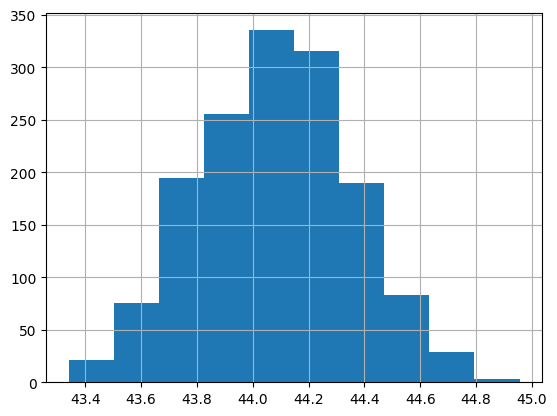

In [193]:
amostras.mean().hist()

Com o aumento do número da amostra, a distribuição das médias amostrais se aproximam de uma distribuição normal com média igual a média populacional e o desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra.

In [194]:
dados.Idade.mean()

44.07142113482561

In [195]:
amostras.mean().mean()

44.07938566666667

In [196]:
amostras.mean().std()

0.2736059250626257

In [197]:
dados.Idade.std()

12.48058346535974

In [198]:
dados.Idade.std() /np.sqrt(n)

0.27907433027404266

### Níveis de confiança e significância
***

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

### Erro inferencial

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão populacional conhecido

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão populacional desconhecido

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

Exemplo: 
Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de desvio padrão populacional igual a 150 g. Selecionada uma amostra aleatório de 20 sacos de um lote específico, obteve-se um peso médio de 5.050 g. Construa um intervalo de confiança para a média populacional assumindo um nível de significância de 5%.

In [199]:
media_amostral = 5050
significancia = 0.05
confianca = 1 - significancia

In [200]:
tabela_normal_padronizada[16:26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


Para estimar o valor médio gasto por cada cliente de uma grande rede de fast-food, foi selecionada uma amostra de 50 clientes.

Assumindo que o valor do desvio padrão da população seja de R$ 6,00 e que esta população se distribui normalmente, obtenha a margem de erro desta estimativa para um nível de confiança de 95%.

In [205]:
z = norm.ppf(0.975)
dp = 6
n =50

erro = z * (dp /(np.sqrt(50)))
erro

1.6630845892196133

Uma amostra aleatória simples de 1976 itens de uma população normalmente distribuída, com desvio padrão populacional igual a 11, resultou em uma média amostral de 28.

Qual o intervalo de confiança de 90% para a média populacional?

In [209]:
raiz_n = np.sqrt(1976)
dp = 11
media = 28
z = norm.ppf(0.90)

u1 = media + (z * (dp/raiz_n))
u2 = media - (z * (dp/raiz_n))
print(u1,u2)

28.317128519836498 27.682871480163502


In [219]:
from scipy.stats import norm
import numpy as np

media_amostral = 28
desvio_padrao = 11
n = 1976
confidence_level = 0.90

intervalo = norm.interval(confidence_level, loc=media_amostral, scale=desvio_padrao / np.sqrt(n))
intervalo

(27.592969951356466, 28.407030048643534)

***
### CÁLCULO DO TAMANHO DA AMOSTRA

#### Variáveis quantitativas e população infinita

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão conhecido

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Com desvio padrão desconhecido

## $$n = \left(z\frac{s}{e}\right)^2$$

Onde:

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

### <font color='red'>Observações</font>

1. O desvio padrão ($\sigma$ ou $s$) e o erro ($e$) devem estar na mesma unidade de medida.

2. Quando o erro ($e$) for representado em termos percentuais, deve ser interpretado como um percentual relacionado à média.

Estamos estudando o rendimento mensal dos chefes de domicílios no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 100,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 3.323,39**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

In [229]:
z = norm.ppf(0.975)
z

1.959963984540054

In [234]:
sigma = 3323.39
erro = 100

In [236]:
n = (z * (sigma/erro))**2
int(n.round())

4243

O valor do gasto médio dos clientes de uma loja de conveniência é de R$\$$ 45,50. Assumindo que o desvio padrão dos gastos é igual a R$ 15,00, qual deve ser o tamanho da amostra para estimarmos a média populacional com um nível de significância de 10%?

Considere que o erro máximo aceitável seja de 10%.


In [240]:
sigma = 15
media = 45.5
erro = 0.1 * media
z = norm.ppf(0.95)

n = (z * (sigma/erro))**2
n

29.404529751067166

#### Variáveis quantitativas e população finita
***

#### Com desvio padrão conhecido

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Com desvio padrão desconhecido

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Onde:

$N$ = tamanho da população

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

<font color='red'> OBS:<font> $e$ precisa sempre estar na mesma unidade de medida do desvio padrão.

Ex: Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

In [242]:
N = 1000
z = norm.ppf(0.975)
s = 12
e = 5

n = ( (z**2) * (s**2) * (N) ) / ( ((z**2)* (s**2)) + ((e**2)*(N-1)) )
int(n.round())

22

Um fabricante de farinha verificou que, em uma amostra aleatória formada por 200 sacos de 25 kg de um lote formado por 2.000 sacos, apresentou um desvio padrão amostral do peso igual a 480 g.

Considerando um erro máximo associado à média populacional igual a 0,3 kg e um nível de confiança igual a 95%, qual tamanho de amostra deveria ser selecionado para obtermos uma estimativa confiável do parâmetro populacional?

In [243]:
N = 2000
s = 480/1000
e = 0.3
z = norm.ppf(0.975)

n = ( (z**2) * (s**2) * (N) ) / ( ((z**2)* (s**2)) + ((e**2)*(N-1)) )
int(n.round())

10

#### Rendimento médio:

Estamos estudando o **rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil**. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79** e que a **média populacional** é de **R$\$$ 1.426,54**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média considerando o tamanho de amostra obtido?

In [254]:
renda_5000 = dados.query('Renda<=5000').Renda
media = renda_5000.mean()
sigma = renda_5000.std()
e = 10
sigma

1082.7945490306845

In [255]:
media

1426.5372144947232

In [258]:
z = norm.ppf(0.975)
n1 = (z * (sigma/e))**2
int(n1.round())

45039

In [259]:
#Calculando o intervalo de confiança
confidence_level = 0.95
intervalo = norm.interval(confidence_level, loc=media, scale=sigma / np.sqrt(n1))
intervalo

(1416.5372144947232, 1436.5372144947232)

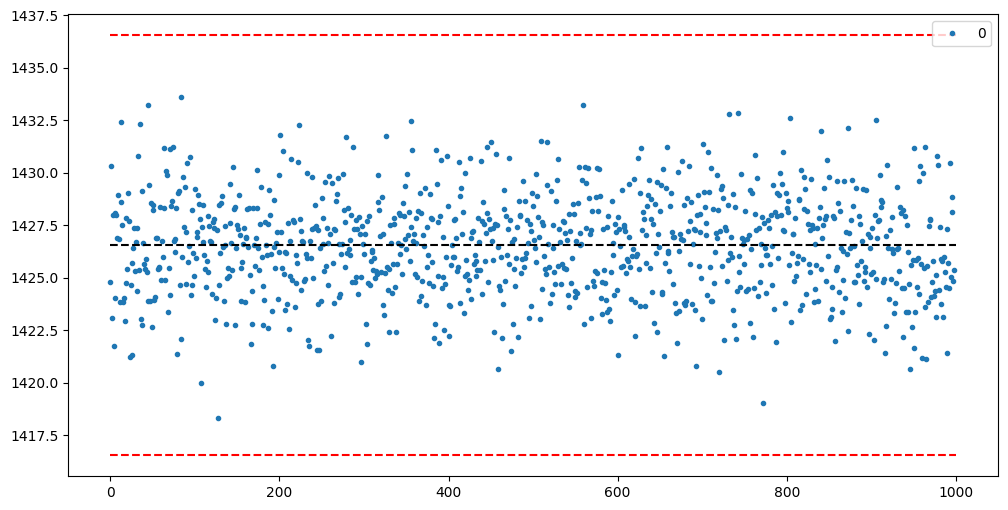

In [266]:
import matplotlib.pyplot as plt
import pandas as pd

tamanho = 1000
medias = [renda_5000.sample(n=int(n), replace=True).mean() for i in range(1, tamanho)]
medias = pd.DataFrame(medias)

ax = medias.plot(style='.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y=media, xmin=0, xmax=tamanho, colors='black', linestyles='dashed')
ax.hlines(y=intervalo[0], xmin=0, xmax=tamanho, colors='red', linestyles='dashed')
ax.hlines(y=intervalo[1], xmin=0, xmax=tamanho, colors='red', linestyles='dashed')

plt.show()
